<a href="https://colab.research.google.com/github/jhordi19/Ciencia_de_datos/blob/Taller_2025/Taller_Sem05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **RANDOM FOREST**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

file_path = 'Hypertension-risk-model-main.csv'
df = pd.read_csv(file_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4240 non-null   int64  
 1   age            4240 non-null   int64  
 2   currentSmoker  4240 non-null   int64  
 3   cigsPerDay     4211 non-null   float64
 4   BPMeds         4187 non-null   float64
 5   diabetes       4240 non-null   int64  
 6   totChol        4190 non-null   float64
 7   sysBP          4240 non-null   float64
 8   diaBP          4240 non-null   float64
 9   BMI            4221 non-null   float64
 10  heartRate      4239 non-null   float64
 11  glucose        3852 non-null   float64
 12  Risk           4240 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 430.8 KB


In [ ]:
df.head(20)

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0.0,0.0,0,228.0,180.0,110.0,30.30,77.0,99.0,1
6,0,63,0,0.0,0.0,0,205.0,138.0,71.0,33.11,60.0,85.0,0
7,0,45,1,20.0,0.0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0.0,0.0,0,260.0,141.5,89.0,26.36,76.0,79.0,1
9,1,43,1,30.0,0.0,0,225.0,162.0,107.0,23.61,93.0,88.0,1


In [ ]:
df.isnull().sum()

,0
male,0
age,0
currentSmoker,0
cigsPerDay,29
BPMeds,53
diabetes,0
totChol,50
sysBP,0
diaBP,0
BMI,19


In [ ]:
for column in ['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']:
    median_value = df[column].median()
    df[column] = df[column].fillna(median_value)

df.drop(columns=['BPMeds', 'glucose', 'totChol', 'heartRate'], inplace=True)

X = df.drop(columns=['Risk'])
y = df['Risk']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

best_rf = RandomForestClassifier(
    n_estimators=271,
    max_depth=5,
    min_samples_split=6,
    min_samples_leaf=2,
    max_features=None,
    random_state=42
)

best_rf.fit(X_train_res, y_train_res)

y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Reporte de clasificación:")
print(report)


Accuracy: 0.8986
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       292
           1       0.79      0.91      0.85       132

    accuracy                           0.90       424
   macro avg       0.88      0.90      0.89       424
weighted avg       0.91      0.90      0.90       424



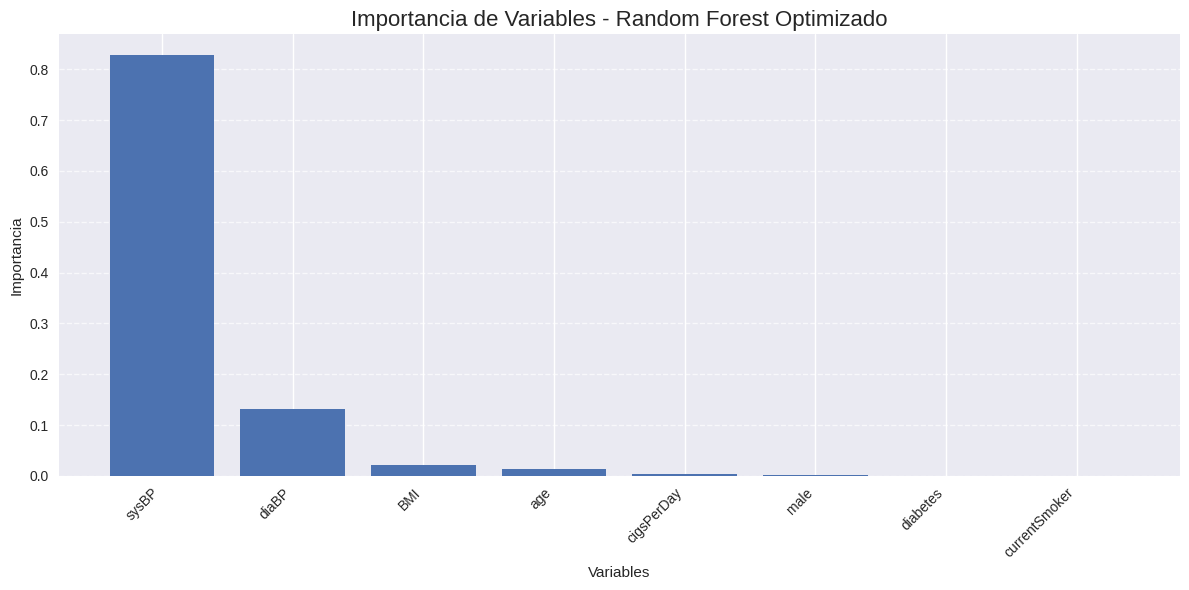

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importances = best_rf.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Importancia de Variables - Random Forest Optimizado", fontsize=16)
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45, ha='right')
plt.ylabel("Importancia")
plt.xlabel("Variables")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##**REGRESION LOGISTICA**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

file_path = 'Hypertension-risk-model-main.csv'
df = pd.read_csv(file_path)

for column in ['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']:
    median_value = df[column].median()
    df[column] = df[column].fillna(median_value)

df.drop(columns=['BPMeds', 'glucose', 'totChol', 'heartRate'], inplace=True)

X = df.drop(columns=['Risk'])
y = df['Risk']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("=== Logistic Regression ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print(classification_report(y_test, y_pred_logreg))

=== Logistic Regression ===
Accuracy: 0.8774
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       585
           1       0.83      0.76      0.79       263

    accuracy                           0.88       848
   macro avg       0.86      0.85      0.85       848
weighted avg       0.88      0.88      0.88       848



##**XGBoost**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

file_path = 'Hypertension-risk-model-main.csv'
df = pd.read_csv(file_path)

for column in ['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']:
    median_value = df[column].median()
    df[column] = df[column].fillna(median_value)

df.drop(columns=['BPMeds', 'glucose', 'totChol', 'heartRate'], inplace=True)

X = df.drop(columns=['Risk'])
y = df['Risk']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("=== XGBoost Classifier ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(classification_report(y_test, y_pred_xgb))


=== XGBoost Classifier ===
Accuracy: 0.8667
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       585
           1       0.78      0.79      0.79       263

    accuracy                           0.87       848
   macro avg       0.84      0.85      0.84       848
weighted avg       0.87      0.87      0.87       848



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:18:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


══════════════════════════════════════════════════
              COMPARACIÓN DE MODELOS              
══════════════════════════════════════════════════
                     Accuracy  Precision  Recall  F1-Score
Random Forest          0.8950     0.9027  0.8950    0.8969
Logistic Regression    0.8774     0.8757  0.8774    0.8760
XGBoost                0.8667     0.8672  0.8667    0.8670
══════════════════════════════════════════════════


<Figure size 1000x600 with 0 Axes>

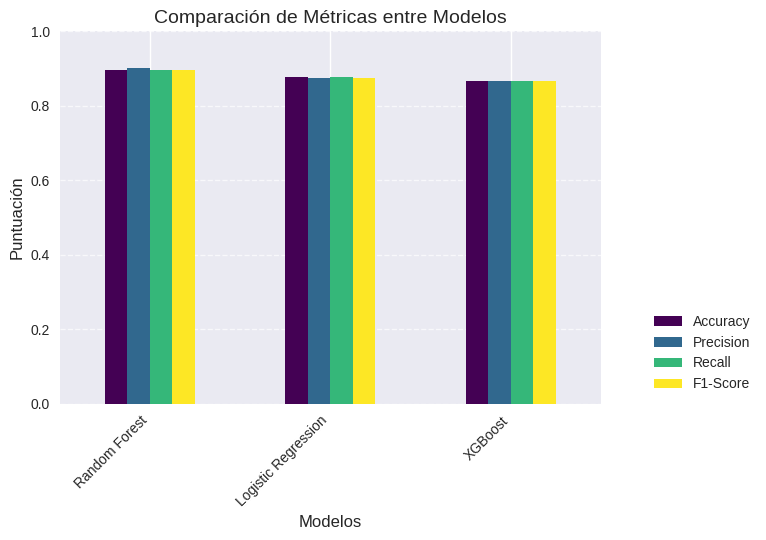

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
from math import pi

y_pred_rf = best_rf.predict(X_test)

def calculate_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1-Score': f1_score(y_true, y_pred, average='weighted')
    }

rf_metrics = calculate_metrics(y_test, y_pred_rf)
logreg_metrics = calculate_metrics(y_test, y_pred_logreg)
xgb_metrics = calculate_metrics(y_test, y_pred_xgb)

comparison_df = pd.DataFrame({
    'Random Forest': rf_metrics,
    'Logistic Regression': logreg_metrics,
    'XGBoost': xgb_metrics
}).transpose()

print("═"*50)
print("COMPARACIÓN DE MODELOS".center(50))
print("═"*50)
print(comparison_df.round(4))
print("═"*50)

plt.figure(figsize=(10, 6))
comparison_df.plot(kind='bar', colormap='viridis')
plt.title('Comparación de Métricas entre Modelos', fontsize=14)
plt.ylabel('Puntuación', fontsize=12)
plt.xlabel('Modelos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0))
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



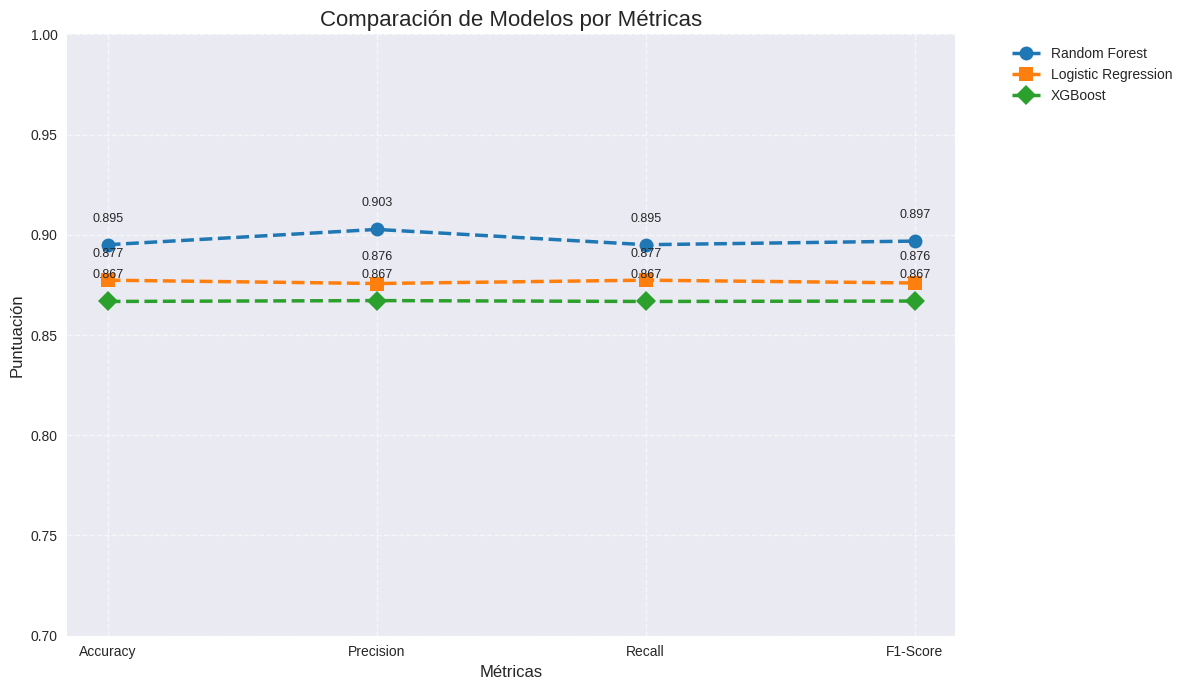

In [ ]:
plt.figure(figsize=(12, 7))
markers = ['o', 's', 'D']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for idx, model in enumerate(comparison_df.index):
    plt.plot(comparison_df.columns, comparison_df.loc[model],
             label=model, marker=markers[idx],
             color=colors[idx], linewidth=2.5,
             markersize=10, linestyle='--')

plt.title('Comparación de Modelos por Métricas', fontsize=16)
plt.xlabel('Métricas', fontsize=12)
plt.ylabel('Puntuación', fontsize=12)
plt.ylim(0.7, 1.0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for model in comparison_df.index:
    for i, metric in enumerate(comparison_df.columns):
        plt.text(i, comparison_df.loc[model, metric]+0.01,
                 f"{comparison_df.loc[model, metric]:.3f}",
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()